In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/drive-download-20240214T042325Z-001.zip

Archive:  /content/gdrive/MyDrive/drive-download-20240214T042325Z-001.zip
  inflating: countries.csv.zip       
  inflating: age_gender_bkts.csv.zip  
  inflating: Airbnb New User Bookings.docx  
  inflating: sample_submission_NDF.csv.zip  
  inflating: test_users.csv.zip      
  inflating: train_users_2.csv.zip   
  inflating: sessions.csv.zip        


In [3]:
# importing common libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
!unzip /content/sample_submission_NDF.csv.zip

Archive:  /content/sample_submission_NDF.csv.zip
  inflating: sample_submission_NDF.csv  


In [5]:
# loading data files
age_gender_bkts = pd.read_csv('/content/age_gender_bkts.csv.zip')
countries_data = pd.read_csv('/content/countries.csv.zip')
session_data  =pd.read_csv('/content/sessions.csv.zip')
test_users_data = pd.read_csv('/content/test_users.csv.zip')
train_users_data = pd.read_csv('/content/train_users_2.csv.zip')

In [6]:
data_set_list = [age_gender_bkts, countries_data, session_data, test_users_data, train_users_data]
name_data_sets = ['age_gender_bkts', 'countries_data', 'session_data', 'test_users_data', 'train_users_data']
for i in range(len(data_set_list)):
  print("data_set", name_data_sets[i])
  print("No of rows:", data_set_list[i].shape[0])
  print("No of columns:", data_set_list[i].shape[1])
  print("-"*10)

data_set age_gender_bkts
No of rows: 420
No of columns: 5
----------
data_set countries_data
No of rows: 10
No of columns: 7
----------
data_set session_data
No of rows: 10567737
No of columns: 6
----------
data_set test_users_data
No of rows: 62096
No of columns: 15
----------
data_set train_users_data
No of rows: 213451
No of columns: 16
----------


In [7]:
for i in range(len(data_set_list)):
  print("data_set columns", name_data_sets[i])
  print(data_set_list[i].isnull().sum())

data_set columns age_gender_bkts
age_bucket                 0
country_destination        0
gender                     0
population_in_thousands    0
year                       0
dtype: int64
data_set columns countries_data
country_destination              0
lat_destination                  0
lng_destination                  0
distance_km                      0
destination_km2                  0
destination_language             0
language_levenshtein_distance    0
dtype: int64
data_set columns session_data
user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64
data_set columns test_users_data
id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                     

In [8]:
train_columns = train_users_data.columns.to_list()
print(train_columns)
test_columns = test_users_data.columns.to_list()
print(test_columns)

target =  set(train_columns) - set(test_columns)
print(target)

['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'country_destination']
['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
{'country_destination'}


In [9]:
#let's explore age gender buckets
age_gender_bkts.head(20)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '100+'),
  Text(1, 0, '95-99'),
  Text(2, 0, '90-94'),
  Text(3, 0, '85-89'),
  Text(4, 0, '80-84'),
  Text(5, 0, '75-79'),
  Text(6, 0, '70-74'),
  Text(7, 0, '65-69'),
  Text(8, 0, '60-64'),
  Text(9, 0, '55-59'),
  Text(10, 0, '50-54'),
  Text(11, 0, '45-49'),
  Text(12, 0, '40-44'),
  Text(13, 0, '35-39'),
  Text(14, 0, '30-34'),
  Text(15, 0, '25-29'),
  Text(16, 0, '20-24'),
  Text(17, 0, '15-19'),
  Text(18, 0, '10-14'),
  Text(19, 0, '5-9'),
  Text(20, 0, '0-4')])

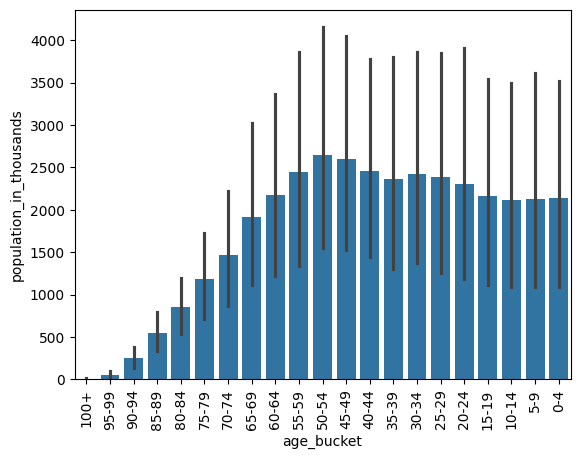

In [10]:
sns.barplot(x='age_bucket', y = 'population_in_thousands', data = age_gender_bkts)
plt.xticks(rotation=90)

In [11]:
# Create a new column for major age buckets
def map_age_bucket(age_bucket):
    #print(age_bucket)
    if '+' in age_bucket:
      start_age = 100
      end_age = 110
    else:
      start_age = int(age_bucket.split('-')[0])
      end_age = int(age_bucket.split('-')[1])
    if end_age <= 20:
        return 'youngster'
    elif end_age <= 40:
        return 'early earning group'
    elif end_age <= 70:
        return 'mid age'
    else:
        return 'senior citizen'

age_gender_bkts['major_age_bucket'] = age_gender_bkts['age_bucket'].apply(map_age_bucket)

# Display the DataFrame
print(age_gender_bkts.head())

  age_bucket country_destination gender  population_in_thousands    year  \
0       100+                  AU   male                      1.0  2015.0   
1      95-99                  AU   male                      9.0  2015.0   
2      90-94                  AU   male                     47.0  2015.0   
3      85-89                  AU   male                    118.0  2015.0   
4      80-84                  AU   male                    199.0  2015.0   

  major_age_bucket  
0   senior citizen  
1   senior citizen  
2   senior citizen  
3   senior citizen  
4   senior citizen  


([0, 1, 2, 3],
 [Text(0, 0, 'senior citizen'),
  Text(1, 0, 'mid age'),
  Text(2, 0, 'early earning group'),
  Text(3, 0, 'youngster')])

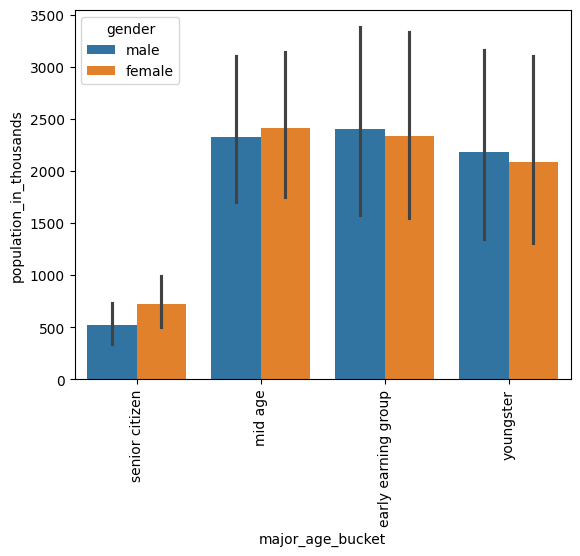

In [12]:
sns.barplot(x='major_age_bucket', y = 'population_in_thousands', hue = 'gender', data = age_gender_bkts)
plt.xticks(rotation=90)

This gives better clarity as, we can observe in Female travelers are more in age group above 70 and mid-age, while usually male travelers are are booking houses/rooms from age 0 to 40.

Airbnb has more users of mid age group and people who have just started earning.

<Axes: xlabel='major_age_bucket', ylabel='population_in_thousands'>

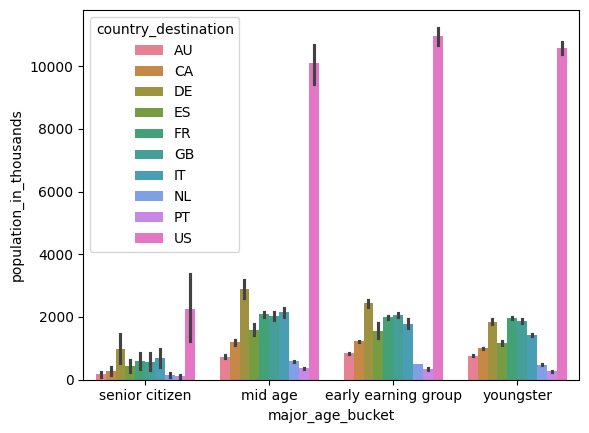

In [13]:
sns.set_palette('viridis')
sns.barplot(x='major_age_bucket', hue='country_destination', y = 'population_in_thousands', data = age_gender_bkts)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '100+'),
  Text(1, 0, '95-99'),
  Text(2, 0, '90-94'),
  Text(3, 0, '85-89'),
  Text(4, 0, '80-84'),
  Text(5, 0, '75-79'),
  Text(6, 0, '70-74'),
  Text(7, 0, '65-69'),
  Text(8, 0, '60-64'),
  Text(9, 0, '55-59'),
  Text(10, 0, '50-54'),
  Text(11, 0, '45-49'),
  Text(12, 0, '40-44'),
  Text(13, 0, '35-39'),
  Text(14, 0, '30-34'),
  Text(15, 0, '25-29'),
  Text(16, 0, '20-24'),
  Text(17, 0, '15-19'),
  Text(18, 0, '10-14'),
  Text(19, 0, '5-9'),
  Text(20, 0, '0-4')])

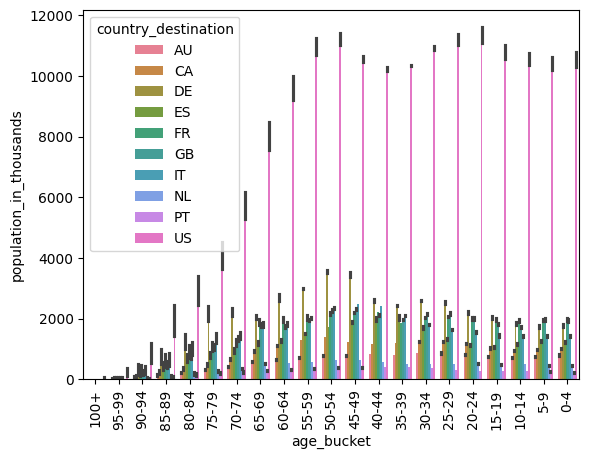

In [14]:
sns.barplot(x='age_bucket', hue='country_destination', y = 'population_in_thousands', data = age_gender_bkts)
plt.xticks(rotation=90)

US as destination is most common among the users.


<Axes: xlabel='gender', ylabel='population_in_thousands'>

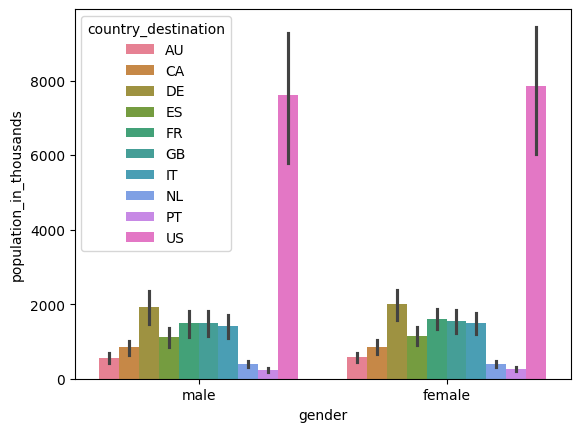

In [15]:
sns.barplot(x='gender', hue='country_destination', y = 'population_in_thousands', data=age_gender_bkts)

This has given the same result. We can't conclude any inclination that any gender has for any specific location.


#Booking Channel and devices analysis

In [19]:
train_users_data.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [24]:
#Finding major browsers used by Airbnb users
counts = train_users_data['first_browser'].value_counts()
counts

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
IE Mobile                  36
Apple Mail                 36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
SeaMonkey                  11
CometBird                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
CoolNovo                    6
wOSBrowser                  6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
TheWorld B

In [26]:
#we should analyze for browsers with significant count to find a fruitful relationship.
threshold = 100
filtered_counts = counts[counts > threshold]
filtered_counts

Chrome             63845
Safari             45169
Firefox            33655
-unknown-          27266
IE                 21068
Mobile Safari      19274
Chrome Mobile       1270
Android Browser      851
AOL Explorer         245
Opera                188
Silk                 124
Name: first_browser, dtype: int64

In [28]:
# Filter the original data based on the filtered categories
filtered_data = train_users_data[train_users_data['first_browser'].isin(filtered_counts.index)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Chrome'),
  Text(1, 0, 'IE'),
  Text(2, 0, 'Firefox'),
  Text(3, 0, 'Safari'),
  Text(4, 0, '-unknown-'),
  Text(5, 0, 'Mobile Safari'),
  Text(6, 0, 'Chrome Mobile'),
  Text(7, 0, 'Android Browser'),
  Text(8, 0, 'AOL Explorer'),
  Text(9, 0, 'Opera'),
  Text(10, 0, 'Silk')])

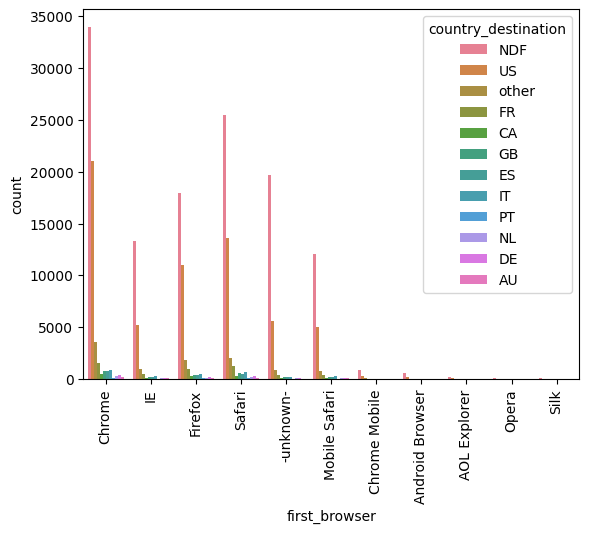

In [29]:
sns.countplot(x='first_browser', hue='country_destination', data = filtered_data)
plt.xticks(rotation=90)

Airbnb users prominently use Chrome browser. As NDF 'No Destination Found' is commonly the highest irrespective of browser that means people are unable to find a suitable place to stay.
**By increasing the number of desitination as per preference of potential customers we can increase the number of booking and revenue of the company.**

We can do customer profiling by knowing the device customers used for booking.

In [31]:
counts = train_users_data['first_device_type'].value_counts()
counts

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Mac Desktop'),
  Text(1, 0, 'Windows Desktop'),
  Text(2, 0, 'iPhone'),
  Text(3, 0, 'Other/Unknown'),
  Text(4, 0, 'Desktop (Other)'),
  Text(5, 0, 'Android Tablet'),
  Text(6, 0, 'iPad'),
  Text(7, 0, 'Android Phone'),
  Text(8, 0, 'SmartPhone (Other)')])

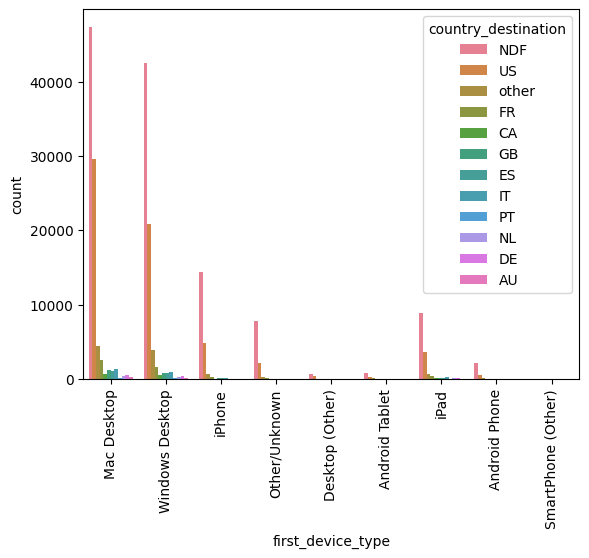

In [34]:
sns.countplot(hue='country_destination', x='first_device_type', data=train_users_data)
plt.xticks(rotation=90)

USA and France remains top destinations for most users across all different device type after NDF.

Most user uses Apple devices.

In [36]:
counts = train_users_data['signup_method'].value_counts()
counts

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

([0, 1, 2],
 [Text(0, 0, 'facebook'), Text(1, 0, 'basic'), Text(2, 0, 'google')])

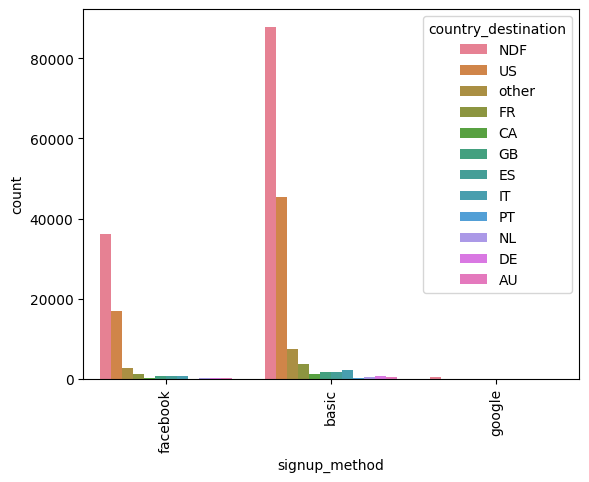

In [37]:
sns.countplot(hue='country_destination', x='signup_method', data=train_users_data)
plt.xticks(rotation=90)

Almost negligible users signuo using google, while facebook for signing up is popular among Airbinb users. **Airbnb should put advertisments when it expands in operations in location on Facebook as it will convert NDF to bookings**



In [38]:
counts = train_users_data['signup_app'].value_counts()
counts

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [40]:
counts = train_users_data['affiliate_provider'].value_counts()
counts

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [48]:
threshold = 100
filtered_count = counts[counts > threshold]
filtered_count

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
Name: affiliate_provider, dtype: int64

Users are mostly reaching directly to the platform. Number of people reaching website through google is second. **Leads from email-marketing and meetup is still less, this needs to improved by having more intractive and relatable meetups.**

In [51]:
filtered_data = train_users_data[train_users_data['affiliate_provider'].isin(filtered_count.index)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'direct'),
  Text(1, 0, 'google'),
  Text(2, 0, 'other'),
  Text(3, 0, 'craigslist'),
  Text(4, 0, 'facebook'),
  Text(5, 0, 'vast'),
  Text(6, 0, 'bing'),
  Text(7, 0, 'meetup'),
  Text(8, 0, 'facebook-open-graph'),
  Text(9, 0, 'email-marketing'),
  Text(10, 0, 'yahoo'),
  Text(11, 0, 'padmapper'),
  Text(12, 0, 'gsp')])

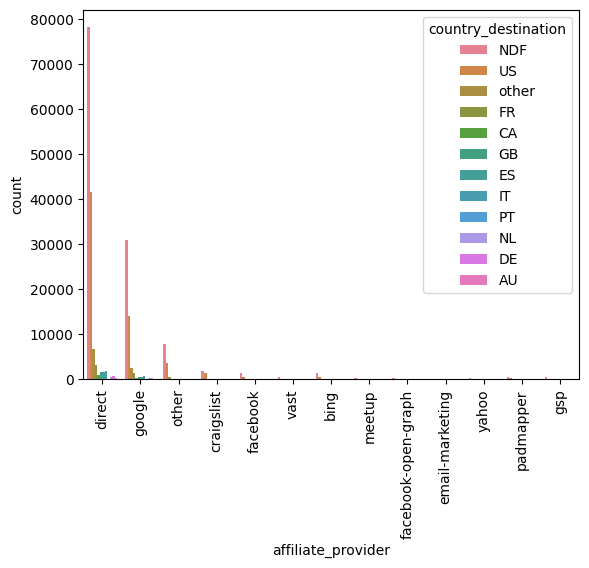

In [53]:
sns.countplot(x='affiliate_provider', hue='country_destination', data = filtered_data)
plt.xticks(rotation=90)

#Booking Times and Pattern



In [56]:
train_users_data['date_account_created'].head()

0    2010-06-28
1    2011-05-25
2    2010-09-28
3    2011-12-05
4    2010-09-14
Name: date_account_created, dtype: object

In [55]:
train_users_data['date_account_created'].min(), train_users_data['date_account_created'].max()

('2010-01-01', '2014-06-30')

In [57]:
train_users_data['date_account_created'] = pd.to_datetime(train_users_data['date_account_created'])
train_users_data['date_account_created'].head()

0   2010-06-28
1   2011-05-25
2   2010-09-28
3   2011-12-05
4   2010-09-14
Name: date_account_created, dtype: datetime64[ns]

We have converted data type from object to datetime for better analysis.

In [58]:
train_users_data['month_created'] = train_users_data['date_account_created'].dt.month
train_users_data['day_of_week_created'] = train_users_data['date_account_created'].dt.day_name()

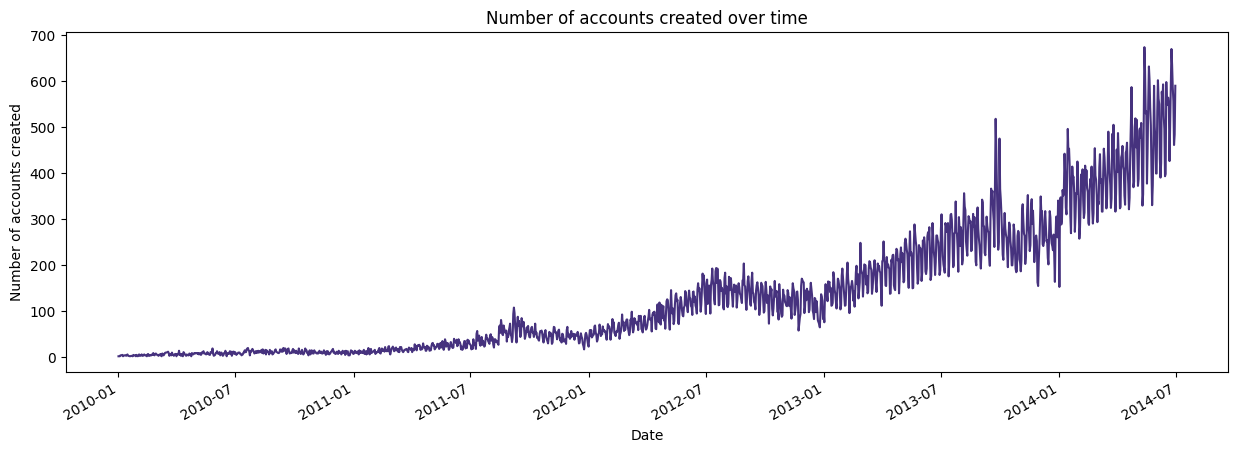

In [63]:
# Group by date and count the number of accounts created on each date
daily_counts = train_users_data.groupby('date_account_created').size()

# Plot the time series
plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Number of accounts created over time')
plt.xlabel('Date')
plt.ylabel('Number of accounts created')
plt.show()

We can observe that it is an upward trending graph with number of accounts created increasing substantially from Jan, 2013.

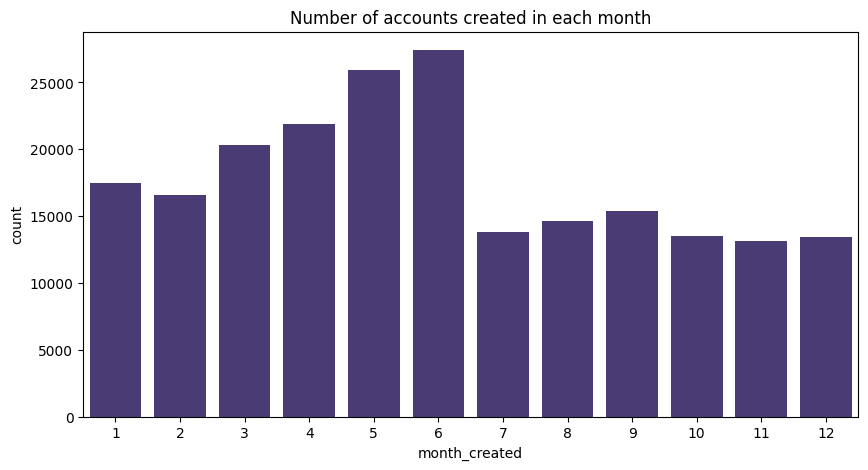

In [60]:
# Number of accounts created in each month
plt.figure(figsize=(10, 5))
sns.countplot(x='month_created', data=train_users_data)
plt.title('Number of accounts created in each month')
plt.show()

Most of the accounts were created in the month of june and july.

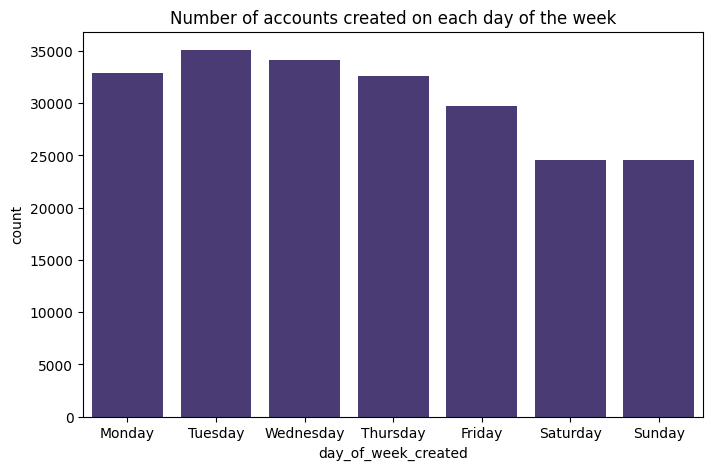

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='day_of_week_created', data=train_users_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of accounts created on each day of the week')
plt.show()

Number of accounts created on weekend is far less as compared to week days.

Let's see how these correlation stands with 'date_first_booking'.

In [64]:
train_users_data['date_first_booking'].head()

0           NaN
1           NaN
2    2010-08-02
3    2012-09-08
4    2010-02-18
Name: date_first_booking, dtype: object

In [65]:
train_users_data['date_first_booking'] = pd.to_datetime(train_users_data['date_first_booking'])

In [67]:
train_users_data['month_booked'] = train_users_data['date_first_booking'].dt.month
train_users_data['day_of_week_booked'] = train_users_data['date_first_booking'].dt.day_name()

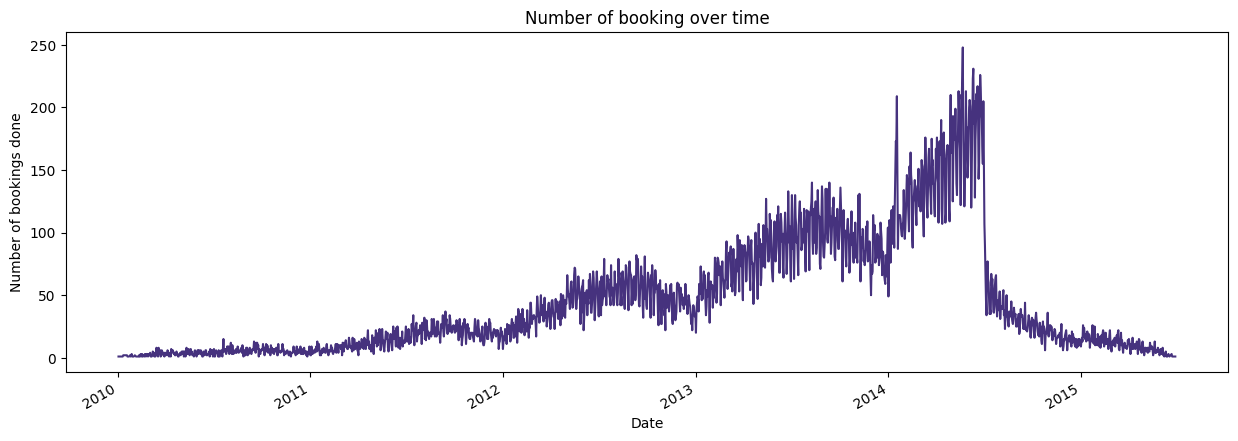

In [69]:
# Group by date and count the number of booking on each date
daily_counts = train_users_data.groupby('date_first_booking').size()

# Plot the time series
plt.figure(figsize=(15, 5))
daily_counts.plot()
plt.title('Number of booking over time')
plt.xlabel('Date')
plt.ylabel('Number of bookings done')
plt.show()

In [73]:
max_booking_date = daily_counts.nlargest(5)

print("Top 5 booking dates:")
for date, count in max_booking_date.items():
    print(f"Date: {date}, Number of bookings: {count}")

Top 5 booking dates:
Date: 2014-05-22 00:00:00, Number of bookings: 248
Date: 2014-06-11 00:00:00, Number of bookings: 231
Date: 2014-06-24 00:00:00, Number of bookings: 226
Date: 2014-05-21 00:00:00, Number of bookings: 225
Date: 2014-06-10 00:00:00, Number of bookings: 223


There is a pattern in booking over time except for the dip in booking after mid 2014.

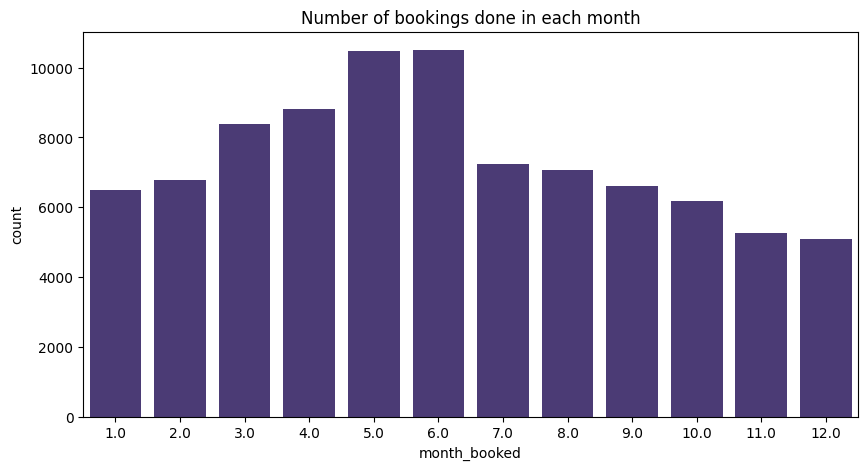

In [70]:
# Number of bookings done each month
plt.figure(figsize=(10, 5))
sns.countplot(x='month_booked', data=train_users_data)
plt.title('Number of bookings done in each month')
plt.show()

**Number of bookings usually peaked in month of june and july which is in adherence to number of accounts created in these two months.** We can observe that there is a downward trend in booking after these months.

**We can conclude that people like to do planing early in the year so it is far better to be aggresive in advertisments in starting months.**


Simple Logistic Regression model:

In [16]:
train_data = train_users_data
test_data = test_users_data

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Assuming 'train_data' is your DataFrame containing the training data
# Drop columns that are not needed for training
X_train = train_data.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'country_destination'], axis=1)
y_train = train_data['country_destination']

# Preprocessing pipeline for numerical and categorical features
numeric_features = ['age', 'signup_flow']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessor and logistic regression model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

# Train the model
clf.fit(X_train, y_train)

# Assuming 'test_data' is your DataFrame containing the test data
# Drop columns that are not needed for testing
X_test = test_data.drop(['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking'], axis=1)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

# Evaluate the model (you would typically use cross-validation for a more robust evaluation)
# For simplicity, here we're just showing the accuracy on the training data
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.6032532056537566


In [18]:
from joblib import dump, load
dump(clf, 'model1.joblib')

['model1.joblib']

In [75]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')


In [76]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/gdrive/MyDrive/Colab Notebooks/.git/


In [85]:
!git add Airbnb_new_user_booking.ipynb
!git config --global user.email "shubhamprasad910@gmail.com"
!git commit -m "Baisc Analysis completed with basic LR model"

[master b16a8f5] Baisc Analysis completed with basic LR model
 1 file changed, 1 insertion(+), 1 deletion(-)


In [78]:
!git config --global user.name "Shubham Prasad"

In [82]:
!git remote add origin https://github.com/jack-sparrow4/Airbnb_New_user_booking.git

In [91]:
!git push origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/jack-sparrow4/Airbnb_New_user_booking.git'


In [92]:
!git checkout master

M	Airbnb_new_user_booking.ipynb
Already on 'master'


In [94]:
!git branch -m master main


In [96]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Airbnb_new_user_booking.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Aerofit_shubham_prasad.ipynb
	Apollo_hospital_shubham.ipynb
	Copy of 04-NLayer2-RevisionNotes.ipynb
	Copy of Class-Polynomial-Regression
	Copy of Notes-Polynomial-Regression-1.ipynb
	Copy of PostRead-Closed-form-solution.ipynb
	Copy of Post_Read - Performance Metrics for Recommender Systems.ipynb
	Copy of Pre-Read-Derivatives.ipynb
	Copy of Suprise_postread.ipynb
	Delhievery_feature_engineering.ipynb
	Jamboree_Edu_Shubham_prasad.ipynb
	Lab_2_fine_tune_generative_ai_model.ipynb
	Lab_3_fine_tune_model_to_detoxify_summaries (1).ipynb
	Lab_3_fine_tune_model_to_detoxify_summaries.ipynb
	Netflix_business_case_study_shubham.ipynb
	Neural_network.ipynb
	Recommendation_sys.ipynb
	Regression_wit

In [100]:
!git config --global user.email "shubhamprasad910@gmail.com"
!git config --global credential.helper cache

!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address


In [98]:
!git remote -v

origin	https://github.com/jack-sparrow4/Airbnb_New_user_booking.git (fetch)
origin	https://github.com/jack-sparrow4/Airbnb_New_user_booking.git (push)
